# English Premier League -  Top 4 Prediction for 2017/18

## Import Dependencies¶

In [1]:
from time import time
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import scale
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer
from sklearn.svm import SVC, LinearSVC
from sklearn import tree
from sklearn import preprocessing
from IPython.display import Image
import pandas as pd
import numpy as np
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats
import seaborn as sns
import matplotlib.pyplot as plt
import random
from xgboost import XGBClassifier
import plotly.plotly as py
import plotly.graph_objs as go
import warnings

%matplotlib inline
warnings.filterwarnings("ignore")

## 1. Getting data from the official EPL website

## a. Web scraping

Using Scrapy attribution 'startproject' to organize scrapying codes in the other folders. You can check the codes in crawler files.
The code below are the example of web scrapying of the standing tables from 2010 to 2018. I wrote codes in the py files and executed in the prompt command.

In [ ]:
import scrapy
import time
from selenium import webdriver
from selenium.webdriver.support.select import Select
from scrapy.selector import Selector
from test_crawler.items import TestItem

class TestItem(scrapy.Item):
    club_name = scrapy.Field()
    position = scrapy.Field()
    won = scrapy.Field()
    drawn = scrapy.Field()
    lost = scrapy.Field()
    goal = scrapy.Field()
    goal_against = scrapy.Field()
    points = scrapy.Field()

class TESTSpider(scrapy.Spider):
    name = "Test"
    allowed_domains = ["premierleague.com"]
    start_urls = ["https://www.premierleague.com/tables"]
    
    def __init__(self):
        scrapy.Spider.__init__(self)
        self.browser = webdriver.Chrome("C:\sta\chromedriver.exe")
    
    def parse(self, response):
        self.browser.get(response.url)
        time.sleep(5)
#2017/18
        html = self.browser.find_element_by_xpath('//*').get_attribute('outerHTML')
        selector = Selector(text=html)
        rows = selector.xpath('//*[@id="mainContent"]/div[2]/div[1]/div[3]/div/div/div/table/tbody/tr[not(@class="expandable")]')
        for row in rows:
            item = TestItem()
            item["club_name"] = row.xpath('./td[3]/a/span[2]/text()')[0].extract()
            item["position"] = row.xpath('./td[2]/span[1]/text()')[0].extract()
            item["won"] = row.xpath('./td[5]/text()')[0].extract()
            item["lost"] = row.xpath('./td[7]/text()')[0].extract()
            item["drawn"] = row.xpath('./td[6]/text()')[0].extract()
            item["goal"] = row.xpath('./td[8]/text()')[0].extract()
            item["goal_against"] = row.xpath('./td[9]/text()')[0].extract()
            item["points"] = row.xpath('./td[11]/text()')[0].extract()
            yield item
#2016/17
        self.browser.find_element_by_xpath('//*[@id="mainContent"]/div[2]/div[1]/section/div[2]/div[2]').click()
        self.browser.find_element_by_xpath('//*[@id="mainContent"]/div[2]/div[1]/section/div[2]/ul/li[2]').click()
        time.sleep(8)
        html = self.browser.find_element_by_xpath('//*').get_attribute('outerHTML')
        selector = Selector(text=html)
        
        rows = selector.xpath('//*[@id="mainContent"]/div[2]/div[1]/div[3]/div/div/div/table/tbody/tr[not(@class="expandable")]')
        for row in rows:
            item = TestItem()
            item["club_name"] = row.xpath('./td[3]/a/span[2]/text()')[0].extract()
            item["position"] = row.xpath('./td[2]/span[1]/text()')[0].extract()
            item["won"] = row.xpath('./td[5]/text()')[0].extract()
            item["lost"] = row.xpath('./td[7]/text()')[0].extract()
            item["drawn"] = row.xpath('./td[6]/text()')[0].extract()
            item["goal"] = row.xpath('./td[8]/text()')[0].extract()
            item["goal_against"] = row.xpath('./td[9]/text()')[0].extract()
            item["points"] = row.xpath('./td[11]/text()')[0].extract()
            yield item
#2015/16
        self.browser.find_element_by_xpath('//*[@id="mainContent"]/div[2]/div[1]/section/div[2]/div[2]').click()
        self.browser.find_element_by_xpath('//*[@id="mainContent"]/div[2]/div[1]/section/div[2]/ul/li[3]').click()
        time.sleep(8)
        html = self.browser.find_element_by_xpath('//*').get_attribute('outerHTML')
        selector = Selector(text=html)
        
        rows = selector.xpath('//*[@id="mainContent"]/div[2]/div[1]/div[3]/div/div/div/table/tbody/tr[not(@class="expandable")]')
        for row in rows:
            item = TestItem()
            item["club_name"] = row.xpath('./td[3]/a/span[2]/text()')[0].extract()
            item["position"] = row.xpath('./td[2]/span[1]/text()')[0].extract()
            item["won"] = row.xpath('./td[5]/text()')[0].extract()
            item["lost"] = row.xpath('./td[7]/text()')[0].extract()
            item["drawn"] = row.xpath('./td[6]/text()')[0].extract()
            item["goal"] = row.xpath('./td[8]/text()')[0].extract()
            item["goal_against"] = row.xpath('./td[9]/text()')[0].extract()
            item["points"] = row.xpath('./td[11]/text()')[0].extract()
            yield item
#2014/15
        self.browser.find_element_by_xpath('//*[@id="mainContent"]/div[2]/div[1]/section/div[2]/div[2]').click()
        self.browser.find_element_by_xpath('//*[@id="mainContent"]/div[2]/div[1]/section/div[2]/ul/li[4]').click()
        time.sleep(8)
        html = self.browser.find_element_by_xpath('//*').get_attribute('outerHTML')
        selector = Selector(text=html)
        
        rows = selector.xpath('//*[@id="mainContent"]/div[2]/div[1]/div[3]/div/div/div/table/tbody/tr[not(@class="expandable")]')
        for row in rows:
            item = TestItem()
            item["club_name"] = row.xpath('./td[3]/a/span[2]/text()')[0].extract()
            item["position"] = row.xpath('./td[2]/span[1]/text()')[0].extract()
            item["won"] = row.xpath('./td[5]/text()')[0].extract()
            item["lost"] = row.xpath('./td[7]/text()')[0].extract()
            item["drawn"] = row.xpath('./td[6]/text()')[0].extract()
            item["goal"] = row.xpath('./td[8]/text()')[0].extract()
            item["goal_against"] = row.xpath('./td[9]/text()')[0].extract()
            item["points"] = row.xpath('./td[11]/text()')[0].extract()
            yield item
#2013/14
        self.browser.find_element_by_xpath('//*[@id="mainContent"]/div[2]/div[1]/section/div[2]/div[2]').click()
        self.browser.find_element_by_xpath('//*[@id="mainContent"]/div[2]/div[1]/section/div[2]/ul/li[5]').click()
        time.sleep(8)
        html = self.browser.find_element_by_xpath('//*').get_attribute('outerHTML')
        selector = Selector(text=html)
        
        rows = selector.xpath('//*[@id="mainContent"]/div[2]/div[1]/div[3]/div/div/div/table/tbody/tr[not(@class="expandable")]')
        for row in rows:
            item = TestItem()
            item["club_name"] = row.xpath('./td[3]/a/span[2]/text()')[0].extract()
            item["position"] = row.xpath('./td[2]/span[1]/text()')[0].extract()
            item["won"] = row.xpath('./td[5]/text()')[0].extract()
            item["lost"] = row.xpath('./td[7]/text()')[0].extract()
            item["drawn"] = row.xpath('./td[6]/text()')[0].extract()
            item["goal"] = row.xpath('./td[8]/text()')[0].extract()
            item["goal_against"] = row.xpath('./td[9]/text()')[0].extract()
            item["points"] = row.xpath('./td[11]/text()')[0].extract()
            yield item
#2012/13
        self.browser.find_element_by_xpath('//*[@id="mainContent"]/div[2]/div[1]/section/div[2]/div[2]').click()
        self.browser.find_element_by_xpath('//*[@id="mainContent"]/div[2]/div[1]/section/div[2]/ul/li[6]').click()
        time.sleep(8)
        html = self.browser.find_element_by_xpath('//*').get_attribute('outerHTML')
        selector = Selector(text=html)
        
        rows = selector.xpath('//*[@id="mainContent"]/div[2]/div[1]/div[3]/div/div/div/table/tbody/tr[not(@class="expandable")]')
        for row in rows:
            item = TestItem()
            item["club_name"] = row.xpath('./td[3]/a/span[2]/text()')[0].extract()
            item["position"] = row.xpath('./td[2]/span[1]/text()')[0].extract()
            item["won"] = row.xpath('./td[5]/text()')[0].extract()
            item["lost"] = row.xpath('./td[7]/text()')[0].extract()
            item["drawn"] = row.xpath('./td[6]/text()')[0].extract()
            item["goal"] = row.xpath('./td[8]/text()')[0].extract()
            item["goal_against"] = row.xpath('./td[9]/text()')[0].extract()
            item["points"] = row.xpath('./td[11]/text()')[0].extract()
            yield item
#2011/12
        self.browser.find_element_by_xpath('//*[@id="mainContent"]/div[2]/div[1]/section/div[2]/div[2]').click()
        self.browser.find_element_by_xpath('//*[@id="mainContent"]/div[2]/div[1]/section/div[2]/ul/li[7]').click()
        time.sleep(8)
        html = self.browser.find_element_by_xpath('//*').get_attribute('outerHTML')
        selector = Selector(text=html)
        
        rows = selector.xpath('//*[@id="mainContent"]/div[2]/div[1]/div[3]/div/div/div/table/tbody/tr[not(@class="expandable")]')
        for row in rows:
            item = TestItem()
            item["club_name"] = row.xpath('./td[3]/a/span[2]/text()')[0].extract()
            item["position"] = row.xpath('./td[2]/span[1]/text()')[0].extract()
            item["won"] = row.xpath('./td[5]/text()')[0].extract()
            item["lost"] = row.xpath('./td[7]/text()')[0].extract()
            item["drawn"] = row.xpath('./td[6]/text()')[0].extract()
            item["goal"] = row.xpath('./td[8]/text()')[0].extract()
            item["goal_against"] = row.xpath('./td[9]/text()')[0].extract()
            item["points"] = row.xpath('./td[11]/text()')[0].extract()
            yield item
#2010/11
        self.browser.find_element_by_xpath('//*[@id="mainContent"]/div[2]/div[1]/section/div[2]/div[2]').click()
        self.browser.find_element_by_xpath('//*[@id="mainContent"]/div[2]/div[1]/section/div[2]/ul/li[8]').click()
        time.sleep(8)
        html = self.browser.find_element_by_xpath('//*').get_attribute('outerHTML')
        selector = Selector(text=html)
        
        rows = selector.xpath('//*[@id="mainContent"]/div[2]/div[1]/div[3]/div/div/div/table/tbody/tr[not(@class="expandable")]')
        for row in rows:
            item = TestItem()
            item["club_name"] = row.xpath('./td[3]/a/span[2]/text()')[0].extract()
            item["position"] = row.xpath('./td[2]/span[1]/text()')[0].extract()
            item["won"] = row.xpath('./td[5]/text()')[0].extract()
            item["lost"] = row.xpath('./td[7]/text()')[0].extract()
            item["drawn"] = row.xpath('./td[6]/text()')[0].extract()
            item["goal"] = row.xpath('./td[8]/text()')[0].extract()
            item["goal_against"] = row.xpath('./td[9]/text()')[0].extract()
            item["points"] = row.xpath('./td[11]/text()')[0].extract()
            yield item

## 2. Exploring Data Analysis
## a. Data Cleaning
### Load tables from 2010 to 2018

In [42]:
tables = pd.read_csv('/Users/hyunilyoo/Documents/analytics/epl-prediction/tables_crawler/table.csv')
tables

,club_name,drawn,goal,goal_against,lost,points,position,won
0,Manchester City,3,83,20,1,78,1,25
1,Manchester United,5,58,23,5,65,2,20
2,Liverpool,9,68,34,4,60,3,17
3,Tottenham Hotspur,7,55,24,5,58,4,17
4,Chelsea,5,52,27,8,56,5,17
5,Arsenal,6,52,41,10,45,6,13
6,Burnley,10,27,26,9,43,7,11
7,Leicester City,10,45,43,10,40,8,10
8,Everton,7,35,49,13,37,9,10
9,Watford,6,39,47,13,36,10,10


### Checking the data types if there are values that need to be converted to either numeric or object values.

In [43]:
tables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 8 columns):
club_name       160 non-null object
drawn           160 non-null int64
goal            160 non-null int64
goal_against    160 non-null int64
lost            160 non-null int64
points          160 non-null int64
position        160 non-null int64
won             160 non-null int64
dtypes: int64(7), object(1)
memory usage: 10.1+ KB


### Converting 'position' to object value

In [44]:
tables['position'] = tables['position'].astype('category')

### Since my interest is predicting the top 4 on the table for 2017/18, I extracted the top 4 teams from 2010 to 2018.

In [45]:
top4_tables = tables[(tables['position'] == 1)|(tables['position'] == 2)|
                     (tables['position'] == 3)|(tables['position'] == 4)]

top4_tables

,club_name,drawn,goal,goal_against,lost,points,position,won
0,Manchester City,3,83,20,1,78,1,25
1,Manchester United,5,58,23,5,65,2,20
2,Liverpool,9,68,34,4,60,3,17
3,Tottenham Hotspur,7,55,24,5,58,4,17
20,Chelsea,3,85,33,5,93,1,30
21,Tottenham Hotspur,8,86,26,4,86,2,26
22,Manchester City,9,80,39,6,78,3,23
23,Liverpool,10,78,42,6,76,4,22
40,Leicester City,12,68,36,3,81,1,23
41,Arsenal,11,65,36,7,71,2,20


### Here are the list of teams and the years who were on Top 4 in past 8 years
Manchester City: 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010  
Manchester United: 2017, 2014, 2012, 2011, 2010  
Arsenal: 2015, 2014, 2013, 2012, 2011, 2010  
Chelsea: 2016, 2014, 2013, 2012, 2010  
Liverpool: 2017, 2016, 2013   
Tottenham Hotspur: 2017, 2016, 2015, 2011  
Leicester City: 2015

### Here is another example of web scraping for each team's match statistics
Code for getting Chelsea's match statistics

In [ ]:
import scrapy
import time
from selenium import webdriver
from selenium.webdriver.support.select import Select
from scrapy.selector import Selector
from clubstats_crawler.items import ClubItem

class CLUBSpider(scrapy.Spider):
    name = "Chelstats"
    allowed_domains = ["premierleague.com"]
    start_urls = [
        "https://www.premierleague.com/clubs/4/Chelsea/stats?se=54"
    ]A

    def __init__(self):
        scrapy.Spider.__init__(self)
        self.browser = webdriver.Chrome("C:\sta\chromedriver.exe")

    def parse(self, response):
        self.browser.get(response.url)
        time.sleep(5)
        html = self.browser.find_element_by_xpath('//*').get_attribute('outerHTML')
        selector = Selector(text=html)
# 2016/17
        item = ClubItem()
        item["club_name"] = selector.xpath('//*[@id="mainContent"]/header/div[2]/div/div/div[2]/h1/text()')[0].extract()
        item["goal_per_match"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[1]/div/div[3]/span/span/text()')[0].extract()
        item["shot_on_target"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[1]/div/div[5]/span/span/text()')[0].extract()
        item["shooting_accuracy"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[1]/div/div[6]/span/span/text()')[0].extract()
        item["big_chance_created"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[1]/div/div[8]/span/span/text()')[0].extract()
        item["pass_per_game"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[2]/div/div[3]/span/span/text()')[0].extract()
        item["pass_accuracy"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[2]/div/div[4]/span/span/text()')[0].extract()
        item["cross"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[2]/div/div[5]/span/span/text()')[0].extract()
        item["cross_accuracy"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[2]/div/div[6]/span/span/text()')[0].extract()
        item["goal_conceded_per_match"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[3]/div/div[4]/span/span/text()')[0].extract()
        item["tackle_success"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[3]/div/div[7]/span/span/text()')[0].extract()
        item["clearance"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[3]/div/div[10]/span/span/text()')[0].extract()
        item["aerial_battles"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[3]/div/div[12]/span/span/text()')[0].extract()
        item["interceptions"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[3]/div/div[9]/span/span/text()')[0].extract()
        yield item

# 2014/15
        self.browser.find_element_by_xpath('//*[@id="mainContent"]/div[3]/div/div/section/div[1]/div[2]').click()
        time.sleep(5)
        self.browser.find_element_by_xpath('//*[@id="mainContent"]/div[3]/div/div/section/div[1]/ul/li[5]').click()
        time.sleep(5)
        html = self.browser.find_element_by_xpath('//*').get_attribute('outerHTML')
        selector = Selector(text=html)

        item = ClubItem()
        item["club_name"] = selector.xpath('//*[@id="mainContent"]/header/div[2]/div/div/div[2]/h1/text()')[0].extract()
        item["goal_per_match"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[1]/div/div[3]/span/span/text()')[0].extract()
        item["shot_on_target"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[1]/div/div[5]/span/span/text()')[0].extract()
        item["shooting_accuracy"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[1]/div/div[6]/span/span/text()')[0].extract()
        item["big_chance_created"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[1]/div/div[8]/span/span/text()')[0].extract()
        item["pass_per_game"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[2]/div/div[3]/span/span/text()')[0].extract()
        item["pass_accuracy"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[2]/div/div[4]/span/span/text()')[0].extract()
        item["cross"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[2]/div/div[5]/span/span/text()')[0].extract()
        item["cross_accuracy"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[2]/div/div[6]/span/span/text()')[0].extract()
        item["goal_conceded_per_match"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[3]/div/div[4]/span/span/text()')[0].extract()
        item["tackle_success"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[3]/div/div[7]/span/span/text()')[0].extract()
        item["clearance"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[3]/div/div[10]/span/span/text()')[0].extract()
        item["aerial_battles"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[3]/div/div[12]/span/span/text()')[0].extract()
        item["interceptions"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[3]/div/div[9]/span/span/text()')[0].extract()
        yield item
# 2013/14
        self.browser.find_element_by_xpath('//*[@id="mainContent"]/div[3]/div/div/section/div[1]/div[2]').click()
        time.sleep(3)
        self.browser.find_element_by_xpath('//*[@id="mainContent"]/div[3]/div/div/section/div[1]/ul/li[6]').click()
        time.sleep(5)
        html = self.browser.find_element_by_xpath('//*').get_attribute('outerHTML')
        selector = Selector(text=html)

        item = ClubItem()
        item["club_name"] = selector.xpath('//*[@id="mainContent"]/header/div[2]/div/div/div[2]/h1/text()')[0].extract()
        item["goal_per_match"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[1]/div/div[3]/span/span/text()')[0].extract()
        item["shot_on_target"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[1]/div/div[5]/span/span/text()')[0].extract()
        item["shooting_accuracy"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[1]/div/div[6]/span/span/text()')[0].extract()
        item["big_chance_created"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[1]/div/div[8]/span/span/text()')[0].extract()
        item["pass_per_game"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[2]/div/div[3]/span/span/text()')[0].extract()
        item["pass_accuracy"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[2]/div/div[4]/span/span/text()')[0].extract()
        item["cross"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[2]/div/div[5]/span/span/text()')[0].extract()
        item["cross_accuracy"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[2]/div/div[6]/span/span/text()')[0].extract()
        item["goal_conceded_per_match"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[3]/div/div[4]/span/span/text()')[0].extract()
        item["tackle_success"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[3]/div/div[7]/span/span/text()')[0].extract()
        item["clearance"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[3]/div/div[10]/span/span/text()')[0].extract()
        item["aerial_battles"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[3]/div/div[12]/span/span/text()')[0].extract()
        item["interceptions"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[3]/div/div[9]/span/span/text()')[0].extract()
        yield item
# 2012/13
        self.browser.find_element_by_xpath('//*[@id="mainContent"]/div[3]/div/div/section/div[1]/div[2]').click()
        time.sleep(3)
        self.browser.find_element_by_xpath('//*[@id="mainContent"]/div[3]/div/div/section/div[1]/ul/li[7]').click()
        time.sleep(5)
        html = self.browser.find_element_by_xpath('//*').get_attribute('outerHTML')
        selector = Selector(text=html)

        item = ClubItem()
        item["club_name"] = selector.xpath('//*[@id="mainContent"]/header/div[2]/div/div/div[2]/h1/text()')[0].extract()
        item["goal_per_match"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[1]/div/div[3]/span/span/text()')[0].extract()
        item["shot_on_target"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[1]/div/div[5]/span/span/text()')[0].extract()
        item["shooting_accuracy"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[1]/div/div[6]/span/span/text()')[0].extract()
        item["big_chance_created"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[1]/div/div[8]/span/span/text()')[0].extract()
        item["pass_per_game"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[2]/div/div[3]/span/span/text()')[0].extract()
        item["pass_accuracy"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[2]/div/div[4]/span/span/text()')[0].extract()
        item["cross"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[2]/div/div[5]/span/span/text()')[0].extract()
        item["cross_accuracy"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[2]/div/div[6]/span/span/text()')[0].extract()
        item["goal_conceded_per_match"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[3]/div/div[4]/span/span/text()')[0].extract()
        item["tackle_success"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[3]/div/div[7]/span/span/text()')[0].extract()
        item["clearance"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[3]/div/div[10]/span/span/text()')[0].extract()
        item["aerial_battles"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[3]/div/div[12]/span/span/text()')[0].extract()
        item["interceptions"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[3]/div/div[9]/span/span/text()')[0].extract()
        yield item
# 2010/11
        self.browser.find_element_by_xpath('//*[@id="mainContent"]/div[3]/div/div/section/div[1]/div[2]').click()
        time.sleep(3)
        self.browser.find_element_by_xpath('//*[@id="mainContent"]/div[3]/div/div/section/div[1]/ul/li[9]').click()
        time.sleep(5)
        html = self.browser.find_element_by_xpath('//*').get_attribute('outerHTML')
        selector = Selector(text=html)

        item = ClubItem()
        item["club_name"] = selector.xpath('//*[@id="mainContent"]/header/div[2]/div/div/div[2]/h1/text()')[0].extract()
        item["goal_per_match"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[1]/div/div[3]/span/span/text()')[0].extract()
        item["shot_on_target"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[1]/div/div[5]/span/span/text()')[0].extract()
        item["shooting_accuracy"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[1]/div/div[6]/span/span/text()')[0].extract()
        item["big_chance_created"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[1]/div/div[8]/span/span/text()')[0].extract()
        item["pass_per_game"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[2]/div/div[3]/span/span/text()')[0].extract()
        item["pass_accuracy"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[2]/div/div[4]/span/span/text()')[0].extract()
        item["cross"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[2]/div/div[5]/span/span/text()')[0].extract()
        item["cross_accuracy"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[2]/div/div[6]/span/span/text()')[0].extract()
        item["goal_conceded_per_match"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[3]/div/div[4]/span/span/text()')[0].extract()
        item["tackle_success"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[3]/div/div[7]/span/span/text()')[0].extract()
        item["clearance"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[3]/div/div[10]/span/span/text()')[0].extract()
        item["aerial_battles"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[3]/div/div[12]/span/span/text()')[0].extract()
        item["interceptions"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[3]/div/div[9]/span/span/text()')[0].extract()
        yield item

### Loading the match statistic files for each team

In [46]:
arsenal = pd.read_csv('/Users/hyunilyoo/Documents/analytics/epl-prediction/clubstats_crawler/arsenal.csv')
chelsea = pd.read_csv('/Users/hyunilyoo/Documents/analytics/epl-prediction/clubstats_crawler/chelsea.csv')
leicester = pd.read_csv('/Users/hyunilyoo/Documents/analytics/epl-prediction/clubstats_crawler/leicester.csv')
liverpool = pd.read_csv('/Users/hyunilyoo/Documents/analytics/epl-prediction/clubstats_crawler/liverpool.csv')
mancity = pd.read_csv('/Users/hyunilyoo/Documents/analytics/epl-prediction/clubstats_crawler/mancity.csv')
manutd = pd.read_csv('/Users/hyunilyoo/Documents/analytics/epl-prediction/clubstats_crawler/manutd.csv')
tottenham = pd.read_csv('/Users/hyunilyoo/Documents/analytics/epl-prediction/clubstats_crawler/tottenham.csv')

In [47]:
chelsea

,aerial_battles,big_chance_created,clearance,club_name,cross,cross_accuracy,goal_conceded_per_match,goal_per_match,interceptions,pass_accuracy,pass_per_game,shooting_accuracy,shot_on_target,tackle_success
0,"2,682",48,839,Chelsea,688,19%,0.87,2.24,510,84%,529.61,35%,204,71%
1,"3,075",66,"1,027",Chelsea,682,22%,0.84,1.92,376,83%,533.37,37%,210,81%
2,"3,055",50,"1,141",Chelsea,809,25%,0.71,1.87,380,83%,480.68,33%,229,77%
3,"2,469",56,981,Chelsea,863,20%,1.03,1.97,504,83%,484.87,34%,212,76%
4,"2,551",86,762,Chelsea,995,25%,0.87,1.82,616,84%,506.21,33%,244,74%


### The data need to be transformed to the format that can be analyzed

In [48]:
def data_clean_sign(club):
    """Excluding non-numeric values such as comma and %"""
    club['cross_accuracy'] = club['cross_accuracy'].map(lambda x: x.rstrip('%'))
    club['pass_accuracy'] = club['pass_accuracy'].map(lambda x: x.rstrip('%'))
    club['shooting_accuracy'] = club['shooting_accuracy'].map(lambda x: x.rstrip('%')) 
    club['tackle_success'] = club['tackle_success'].map(lambda x: x.rstrip('%'))
    club['aerial_battles'] = club['aerial_battles'].str.replace(',','')
    club['clearance'] = club['clearance'].str.replace(',','')

data_clean_sign(arsenal)
data_clean_sign(chelsea)
data_clean_sign(leicester)
data_clean_sign(liverpool)
data_clean_sign(mancity)
data_clean_sign(manutd)
data_clean_sign(tottenham)

In [49]:
manutd

,aerial_battles,big_chance_created,clearance,club_name,cross,cross_accuracy,goal_conceded_per_match,goal_per_match,interceptions,pass_accuracy,pass_per_game,shooting_accuracy,shot_on_target,tackle_success
0,2168,49,727,Manchester United,604,21,0.77,1.93,370,83,511.90,36,148,65
1,2689,54,1118,Manchester United,908,22,0.97,1.63,679,85,560.82,35,180,74
2,2477,89,1319,Manchester United,962,22,1.13,2.26,515,86,518.05,38,213,77
3,2151,85,1165,Manchester United,"1,018",22,0.87,2.34,574,85,531.16,38,243,75
4,2353,71,1053,Manchester United,"1,005",24,0.97,2.05,646,81,496.58,34,212,76


In [50]:
# Delete comma in 'cross' column
manutd['cross'] = manutd['cross'].str.replace(',','')

In [51]:
manutd

,aerial_battles,big_chance_created,clearance,club_name,cross,cross_accuracy,goal_conceded_per_match,goal_per_match,interceptions,pass_accuracy,pass_per_game,shooting_accuracy,shot_on_target,tackle_success
0,2168,49,727,Manchester United,604,21,0.77,1.93,370,83,511.90,36,148,65
1,2689,54,1118,Manchester United,908,22,0.97,1.63,679,85,560.82,35,180,74
2,2477,89,1319,Manchester United,962,22,1.13,2.26,515,86,518.05,38,213,77
3,2151,85,1165,Manchester United,1018,22,0.87,2.34,574,85,531.16,38,243,75
4,2353,71,1053,Manchester United,1005,24,0.97,2.05,646,81,496.58,34,212,76


In [52]:
# Check the data types for variables
chelsea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 14 columns):
aerial_battles             5 non-null object
big_chance_created         5 non-null int64
clearance                  5 non-null object
club_name                  5 non-null object
cross                      5 non-null int64
cross_accuracy             5 non-null object
goal_conceded_per_match    5 non-null float64
goal_per_match             5 non-null float64
interceptions              5 non-null int64
pass_accuracy              5 non-null object
pass_per_game              5 non-null float64
shooting_accuracy          5 non-null object
shot_on_target             5 non-null int64
tackle_success             5 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 640.0+ bytes


In [53]:
def data_transform(club):
    """Transfor non-numeric value to numeric value"""
    club['cross_accuracy'] = pd.to_numeric(club['cross_accuracy']).astype(float)
    club['pass_accuracy'] = pd.to_numeric(club['pass_accuracy']).astype(float)
    club['shooting_accuracy'] = pd.to_numeric(club['shooting_accuracy']).astype(float)
    club['tackle_success'] = pd.to_numeric(club['tackle_success']).astype(float)
    club['aerial_battles'] = pd.to_numeric(club['aerial_battles']).astype(float)
    club['big_chance_created'] = club['big_chance_created'].astype(float)
    club['clearance'] = club['clearance'].astype(float)
    club['cross'] = club['cross'].astype(float)
    club['interceptions'] = club['interceptions'].astype(float)
    club['shot_on_target'] = club['shot_on_target'].astype(float)
    
data_transform(arsenal)
data_transform(chelsea)
data_transform(leicester)
data_transform(liverpool)
data_transform(mancity)
data_transform(manutd)
data_transform(tottenham)

In [54]:
chelsea

,aerial_battles,big_chance_created,clearance,club_name,cross,cross_accuracy,goal_conceded_per_match,goal_per_match,interceptions,pass_accuracy,pass_per_game,shooting_accuracy,shot_on_target,tackle_success
0,2682.0,48.0,839.0,Chelsea,688.0,19.0,0.87,2.24,510.0,84.0,529.61,35.0,204.0,71.0
1,3075.0,66.0,1027.0,Chelsea,682.0,22.0,0.84,1.92,376.0,83.0,533.37,37.0,210.0,81.0
2,3055.0,50.0,1141.0,Chelsea,809.0,25.0,0.71,1.87,380.0,83.0,480.68,33.0,229.0,77.0
3,2469.0,56.0,981.0,Chelsea,863.0,20.0,1.03,1.97,504.0,83.0,484.87,34.0,212.0,76.0
4,2551.0,86.0,762.0,Chelsea,995.0,25.0,0.87,1.82,616.0,84.0,506.21,33.0,244.0,74.0


### Some values are not in average. Since the values that I want to compare is 'per match' values, the values need to be averaged.

In [55]:
def average_wo2017(club):
    club['aerial_battles'] = club['aerial_battles'] / 38
    club['interceptions'] = club['interceptions'] / 38
    club['cross'] = club['cross'] / 38
    club['clearance'] = club['clearance'] / 38
    club['big_chance_created'] = club['big_chance_created'] / 38
    club['shot_on_target'] = club['shot_on_target'] / 38
    club['cross_accuracy'] = club['cross_accuracy'] / 100
    club['pass_accuracy'] = club['pass_accuracy'] / 100
    club['shooting_accuracy'] = club['shooting_accuracy'] / 100
    club['tackle_success'] = club['tackle_success'] / 100

def average_2017(club):
    """
    Currently the teams only have played 29 matches; therefore, the current data need to 
    be divided by 29 not 38 which is the total matches of a year.
    """
    club['aerial_battles'].loc[0] = club['aerial_battles'].loc[0] / 29
    club['interceptions'].loc[0] = club['interceptions'].loc[0] / 29
    club['cross'].loc[0] = club['cross'].loc[0] / 29
    club['clearance'].loc[0] = club['clearance'].loc[0] / 29
    club['big_chance_created'].loc[0] = club['big_chance_created'].loc[0] / 29
    club['shot_on_target'].loc[0] = club['shot_on_target'].loc[0] / 29
    club['cross_accuracy'] = club['cross_accuracy'] / 100
    club['pass_accuracy'] = club['pass_accuracy'] / 100
    club['shooting_accuracy'] = club['shooting_accuracy'] / 100
    club['tackle_success'] = club['tackle_success'] / 100

In [56]:
average_wo2017(arsenal)
average_wo2017(chelsea)
average_wo2017(leicester)
average_2017(liverpool)
average_2017(mancity)
average_2017(manutd)
average_2017(tottenham)

### Rearrange the order of the column so that it makes easlier to read the table.

In [57]:
def col_order(club):
    club_ordered = club[['club_name','goal_per_match', 'goal_conceded_per_match','shooting_accuracy',
          'shot_on_target', 'pass_accuracy', 'pass_per_game','cross', 'cross_accuracy',
          'interceptions', 'aerial_battles','big_chance_created', 'clearance', 'tackle_success']]
    return club_ordered

arsenal = col_order(arsenal)
chelsea = col_order(chelsea)
leicester = col_order(leicester)
liverpool = col_order(liverpool)
mancity = col_order(mancity)
manutd = col_order(manutd)
tottenham = col_order(tottenham)

In [58]:
chelsea

,club_name,goal_per_match,goal_conceded_per_match,shooting_accuracy,shot_on_target,pass_accuracy,pass_per_game,cross,cross_accuracy,interceptions,aerial_battles,big_chance_created,clearance,tackle_success
0,Chelsea,2.24,0.87,0.35,5.368421,0.84,529.61,18.105263,0.19,13.421053,70.578947,1.263158,22.078947,0.71
1,Chelsea,1.92,0.84,0.37,5.526316,0.83,533.37,17.947368,0.22,9.894737,80.921053,1.736842,27.026316,0.81
2,Chelsea,1.87,0.71,0.33,6.026316,0.83,480.68,21.289474,0.25,10.000000,80.394737,1.315789,30.026316,0.77
3,Chelsea,1.97,1.03,0.34,5.578947,0.83,484.87,22.710526,0.20,13.263158,64.973684,1.473684,25.815789,0.76
4,Chelsea,1.82,0.87,0.33,6.421053,0.84,506.21,26.184211,0.25,16.210526,67.131579,2.263158,20.052632,0.74


### Combined  'table' data frame with 'club statistis' dataframe for further analysis.

In [59]:
def final_stats(club):
    c_table = top4_tables[top4_tables['club_name'] == club['club_name'][0]]
    c_table = c_table.drop('club_name', axis=1)
    c_table['t'] = list(range(len(club))) # dummie column implies as a key column. 
    club['t'] = list(range(len(club)))
    result = club.merge(c_table, on=['t'])
    result = result.drop('t', axis=1) # drop the dummie column
    return result

pd.set_option('display.max_columns', 30)

arsenal = final_stats(arsenal)
chelsea = final_stats(chelsea)
leicester = final_stats(leicester)
liverpool = final_stats(liverpool)
mancity = final_stats(mancity)
manutd = final_stats(manutd)
tottenham = final_stats(tottenham)

In [60]:
chelsea

,club_name,goal_per_match,goal_conceded_per_match,shooting_accuracy,shot_on_target,pass_accuracy,pass_per_game,cross,cross_accuracy,interceptions,aerial_battles,big_chance_created,clearance,tackle_success,drawn,goal,goal_against,lost,points,position,won
0,Chelsea,2.24,0.87,0.35,5.368421,0.84,529.61,18.105263,0.19,13.421053,70.578947,1.263158,22.078947,0.71,3,85,33,5,93,1,30
1,Chelsea,1.92,0.84,0.37,5.526316,0.83,533.37,17.947368,0.22,9.894737,80.921053,1.736842,27.026316,0.81,9,73,32,3,87,1,26
2,Chelsea,1.87,0.71,0.33,6.026316,0.83,480.68,21.289474,0.25,10.000000,80.394737,1.315789,30.026316,0.77,7,71,27,6,82,3,25
3,Chelsea,1.97,1.03,0.34,5.578947,0.83,484.87,22.710526,0.20,13.263158,64.973684,1.473684,25.815789,0.76,9,75,39,7,75,3,22
4,Chelsea,1.82,0.87,0.33,6.421053,0.84,506.21,26.184211,0.25,16.210526,67.131579,2.263158,20.052632,0.74,8,69,33,9,71,2,21


In [61]:
all_data = arsenal.append([chelsea, leicester, liverpool, mancity, manutd, tottenham])
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 0 to 3
Data columns (total 21 columns):
club_name                  32 non-null object
goal_per_match             32 non-null float64
goal_conceded_per_match    32 non-null float64
shooting_accuracy          32 non-null float64
shot_on_target             32 non-null float64
pass_accuracy              32 non-null float64
pass_per_game              32 non-null float64
cross                      32 non-null float64
cross_accuracy             32 non-null float64
interceptions              32 non-null float64
aerial_battles             32 non-null float64
big_chance_created         32 non-null float64
clearance                  32 non-null float64
tackle_success             32 non-null float64
drawn                      32 non-null int64
goal                       32 non-null int64
goal_against               32 non-null int64
lost                       32 non-null int64
points                     32 non-null int64
position        

### The dataset is not big enough to perform Machine Learning; therefore, performing a Bootstrapping is necessary.(Overfitting highly likely to occur with small data)
a. Drop 'club_name' since it is not needed to analyzed.   
b. 'goal' and 'goal_against' are also will be removed because they are very relevant with 'goal_per match' and 'goal_conceded_per_match'.    
c. Before increase size of data, drop the features that are unnecessary in this analysis.  
d. Normalizing the value of features for better performance.

In [100]:
final_data = all_data.drop(['club_name', 'goal', 'goal_against', 'points', 'shot_on_target'], axis=1)

# Reset the indexes
final_data = final_data.reset_index()

# Drop the unnecessary index column
final_data = final_data.drop('index', axis=1)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 16 columns):
goal_per_match             32 non-null float64
goal_conceded_per_match    32 non-null float64
shooting_accuracy          32 non-null float64
pass_accuracy              32 non-null float64
pass_per_game              32 non-null float64
cross                      32 non-null float64
cross_accuracy             32 non-null float64
interceptions              32 non-null float64
aerial_battles             32 non-null float64
big_chance_created         32 non-null float64
clearance                  32 non-null float64
tackle_success             32 non-null float64
drawn                      32 non-null int64
lost                       32 non-null int64
position                   32 non-null category
won                        32 non-null int64
dtypes: category(1), float64(12), int64(3)
memory usage: 4.6 KB


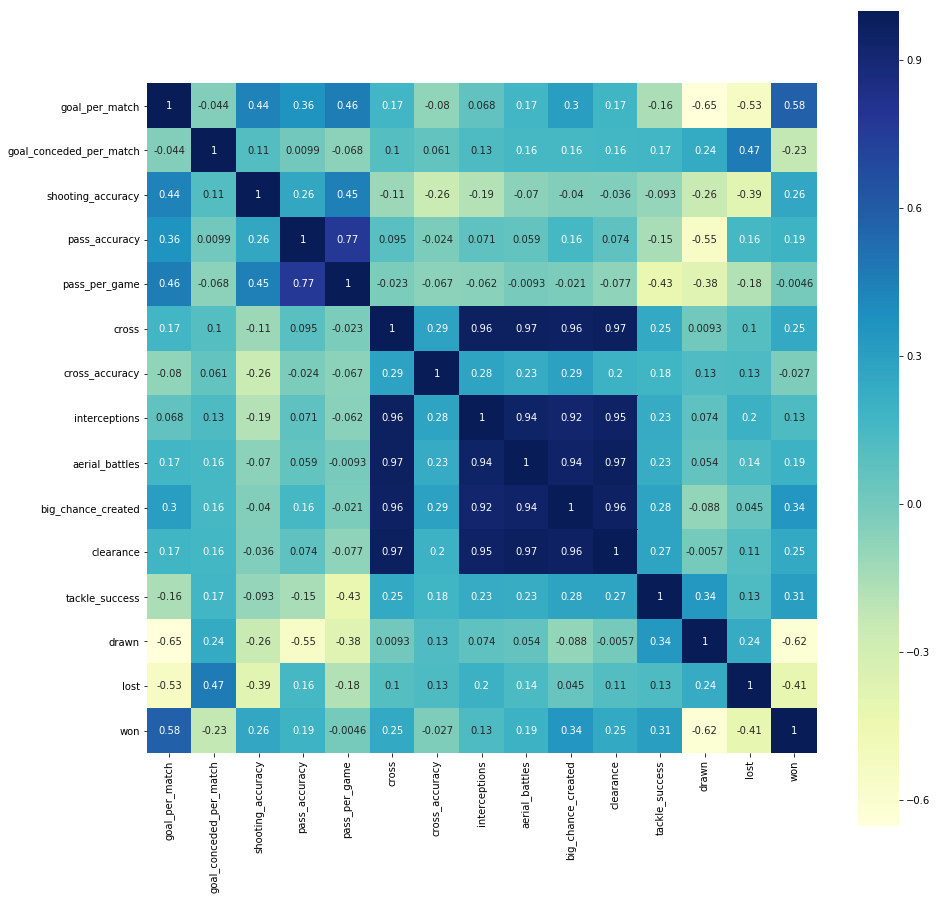

In [101]:
f, ax = plt.subplots(figsize=(15, 15))
corr = final_data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), annot=True, cmap='YlGnBu', square=True, ax=ax)

In [86]:
position1 = final_data[final_data['position'] == 1]
position2 = final_data[final_data['position'] == 2]
position3 = final_data[final_data['position'] == 3]
position4 = final_data[final_data['position'] == 4]

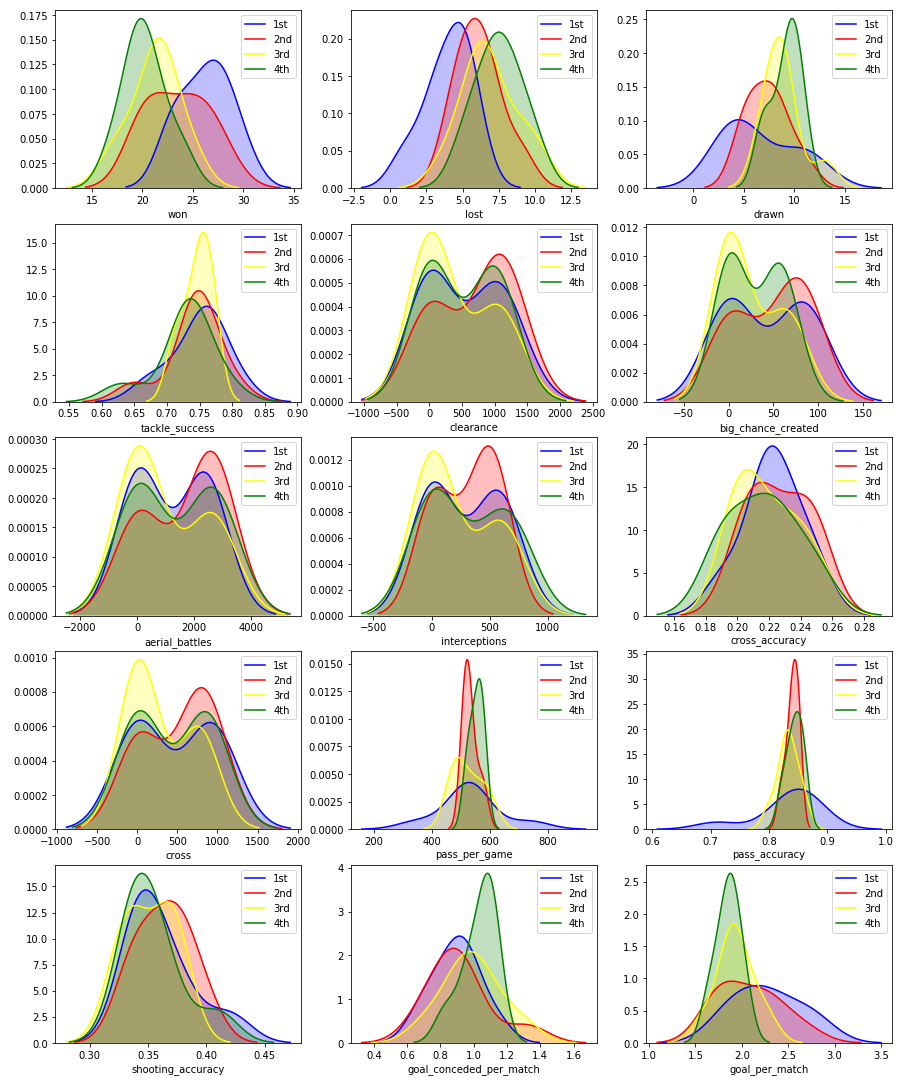

In [109]:
f, axes = plt.subplots(5, 3, figsize=(15, 19))

sns.distplot(position1['won'], hist=False, color='blue', kde_kws={'shade': True}, ax=axes[0, 0], label='1st')
sns.distplot(position2['won'], hist=False, color='red', kde_kws={'shade': True}, ax=axes[0, 0], label='2nd')
sns.distplot(position3['won'], hist=False, color='yellow', kde_kws={'shade': True}, ax=axes[0, 0],label='3rd')
sns.distplot(position4['won'], hist=False, color='green', kde_kws={'shade': True}, ax=axes[0, 0],label='4th')

sns.distplot(position1['lost'], hist=False, color='blue', kde_kws={'shade': True}, ax=axes[0, 1],label='1st')
sns.distplot(position2['lost'], hist=False, color='red', kde_kws={'shade': True}, ax=axes[0, 1], label='2nd')
sns.distplot(position3['lost'], hist=False, color='yellow', kde_kws={'shade': True}, ax=axes[0, 1], label='3rd')
sns.distplot(position4['lost'], hist=False, color='green', kde_kws={'shade': True}, ax=axes[0, 1], label='4th')

sns.distplot(position1['drawn'], hist=False, color='blue', kde_kws={'shade': True}, ax=axes[0, 2],label='1st')
sns.distplot(position2['drawn'], hist=False, color='red', kde_kws={'shade': True}, ax=axes[0, 2], label='2nd')
sns.distplot(position3['drawn'], hist=False, color='yellow', kde_kws={'shade': True}, ax=axes[0, 2], label='3rd')
sns.distplot(position4['drawn'], hist=False, color='green', kde_kws={'shade': True}, ax=axes[0, 2], label='4th')

sns.distplot(position1['tackle_success'], hist=False, color='blue', kde_kws={'shade': True}, ax=axes[1, 0],label='1st')
sns.distplot(position2['tackle_success'], hist=False, color='red', kde_kws={'shade': True}, ax=axes[1, 0], label='2nd')
sns.distplot(position3['tackle_success'], hist=False, color='yellow', kde_kws={'shade': True}, ax=axes[1, 0], label='3rd')
sns.distplot(position4['tackle_success'], hist=False, color='green', kde_kws={'shade': True}, ax=axes[1, 0], label='4th')

sns.distplot(position1['clearance'], hist=False, color='blue', kde_kws={'shade': True}, ax=axes[1, 1],label='1st')
sns.distplot(position2['clearance'], hist=False, color='red', kde_kws={'shade': True}, ax=axes[1, 1], label='2nd')
sns.distplot(position3['clearance'], hist=False, color='yellow', kde_kws={'shade': True}, ax=axes[1, 1], label='3rd')
sns.distplot(position4['clearance'], hist=False, color='green', kde_kws={'shade': True}, ax=axes[1, 1], label='4th')

sns.distplot(position1['big_chance_created'], hist=False, color='blue', kde_kws={'shade': True}, ax=axes[1, 2],label='1st')
sns.distplot(position2['big_chance_created'], hist=False, color='red', kde_kws={'shade': True}, ax=axes[1, 2], label='2nd')
sns.distplot(position3['big_chance_created'], hist=False, color='yellow', kde_kws={'shade': True}, ax=axes[1, 2], label='3rd')
sns.distplot(position4['big_chance_created'], hist=False, color='green', kde_kws={'shade': True}, ax=axes[1, 2], label='4th')

sns.distplot(position1['aerial_battles'], hist=False, color='blue', kde_kws={'shade': True}, ax=axes[2, 0],label='1st')
sns.distplot(position2['aerial_battles'], hist=False, color='red', kde_kws={'shade': True}, ax=axes[2, 0], label='2nd')
sns.distplot(position3['aerial_battles'], hist=False, color='yellow', kde_kws={'shade': True}, ax=axes[2, 0], label='3rd')
sns.distplot(position4['aerial_battles'], hist=False, color='green', kde_kws={'shade': True}, ax=axes[2, 0], label='4th')

sns.distplot(position1['interceptions'], hist=False, color='blue', kde_kws={'shade': True}, ax=axes[2, 1],label='1st')
sns.distplot(position2['interceptions'], hist=False, color='red', kde_kws={'shade': True}, ax=axes[2, 1], label='2nd')
sns.distplot(position3['interceptions'], hist=False, color='yellow', kde_kws={'shade': True}, ax=axes[2, 1], label='3rd')
sns.distplot(position4['interceptions'], hist=False, color='green', kde_kws={'shade': True}, ax=axes[2, 1], label='4th')

sns.distplot(position1['cross_accuracy'], hist=False, color='blue', kde_kws={'shade': True}, ax=axes[2, 2],label='1st')
sns.distplot(position2['cross_accuracy'], hist=False, color='red', kde_kws={'shade': True}, ax=axes[2, 2], label='2nd')
sns.distplot(position3['cross_accuracy'], hist=False, color='yellow', kde_kws={'shade': True}, ax=axes[2, 2], label='3rd')
sns.distplot(position4['cross_accuracy'], hist=False, color='green', kde_kws={'shade': True}, ax=axes[2, 2], label='4th')

sns.distplot(position1['cross'], hist=False, color='blue', kde_kws={'shade': True}, ax=axes[3, 0],label='1st')
sns.distplot(position2['cross'], hist=False, color='red', kde_kws={'shade': True}, ax=axes[3, 0], label='2nd')
sns.distplot(position3['cross'], hist=False, color='yellow', kde_kws={'shade': True}, ax=axes[3, 0], label='3rd')
sns.distplot(position4['cross'], hist=False, color='green', kde_kws={'shade': True}, ax=axes[3, 0], label='4th')

sns.distplot(position1['pass_per_game'], hist=False, color='blue', kde_kws={'shade': True}, ax=axes[3, 1],label='1st')
sns.distplot(position2['pass_per_game'], hist=False, color='red', kde_kws={'shade': True}, ax=axes[3, 1], label='2nd')
sns.distplot(position3['pass_per_game'], hist=False, color='yellow', kde_kws={'shade': True}, ax=axes[3, 1], label='3rd')
sns.distplot(position4['pass_per_game'], hist=False, color='green', kde_kws={'shade': True}, ax=axes[3, 1], label='4th')

sns.distplot(position1['pass_accuracy'], hist=False, color='blue', kde_kws={'shade': True}, ax=axes[3, 2],label='1st')
sns.distplot(position2['pass_accuracy'], hist=False, color='red', kde_kws={'shade': True}, ax=axes[3, 2], label='2nd')
sns.distplot(position3['pass_accuracy'], hist=False, color='yellow', kde_kws={'shade': True}, ax=axes[3, 2], label='3rd')
sns.distplot(position4['pass_accuracy'], hist=False, color='green', kde_kws={'shade': True}, ax=axes[3, 2], label='4th')

sns.distplot(position1['shooting_accuracy'], hist=False, color='blue', kde_kws={'shade': True}, ax=axes[4, 0],label='1st')
sns.distplot(position2['shooting_accuracy'], hist=False, color='red', kde_kws={'shade': True}, ax=axes[4, 0], label='2nd')
sns.distplot(position3['shooting_accuracy'], hist=False, color='yellow', kde_kws={'shade': True}, ax=axes[4, 0], label='3rd')
sns.distplot(position4['shooting_accuracy'], hist=False, color='green', kde_kws={'shade': True}, ax=axes[4, 0], label='4th')

sns.distplot(position1['goal_conceded_per_match'], hist=False, color='blue', kde_kws={'shade': True}, ax=axes[4, 1],label='1st')
sns.distplot(position2['goal_conceded_per_match'], hist=False, color='red', kde_kws={'shade': True}, ax=axes[4, 1], label='2nd')
sns.distplot(position3['goal_conceded_per_match'], hist=False, color='yellow', kde_kws={'shade': True}, ax=axes[4, 1], label='3rd')
sns.distplot(position4['goal_conceded_per_match'], hist=False, color='green', kde_kws={'shade': True}, ax=axes[4, 1], label='4th')

sns.distplot(position1['goal_per_match'], hist=False, color='blue', kde_kws={'shade': True}, ax=axes[4, 2],label='1st')
sns.distplot(position2['goal_per_match'], hist=False, color='red', kde_kws={'shade': True}, ax=axes[4, 2], label='2nd')
sns.distplot(position3['goal_per_match'], hist=False, color='yellow', kde_kws={'shade': True}, ax=axes[4, 2], label='3rd')
sns.distplot(position4['goal_per_match'], hist=False, color='green', kde_kws={'shade': True}, ax=axes[4, 2], label='4th')

In [108]:
final_data.head()

,goal_per_match,goal_conceded_per_match,shooting_accuracy,pass_accuracy,pass_per_game,cross,cross_accuracy,interceptions,aerial_battles,big_chance_created,clearance,tackle_success,drawn,lost,position,won
0,1.71,0.95,0.37,0.84,559.18,19.842105,0.25,19.315789,73.289474,2.315789,22.342105,0.73,11,7,2,20
1,1.87,0.95,0.37,0.84,540.18,22.789474,0.20,20.052632,85.315789,1.736842,26.473684,0.75,9,7,3,22
2,1.79,1.08,0.41,0.86,567.39,19.815789,0.22,14.236842,73.078947,1.631579,31.763158,0.74,7,7,4,24
3,1.89,0.97,0.34,0.86,555.53,25.026316,0.19,16.736842,74.736842,1.842105,22.973684,0.79,10,7,4,21
4,1.95,1.29,0.37,0.85,542.08,23.578947,0.22,15.921053,61.473684,2.552632,20.157895,0.74,7,10,3,21


### Using Scikit-Learn to select the features that are goint to use in the ML model.

In [103]:
X, y = all_data.loc[:, all_data.columns != 'position'], all_data.position
new_data = pd.DataFrame(SelectKBest(chi2, k=4).fit_transform(X, y))
new_data.head()

ValueError: could not convert string to float: 'Tottenham Hotspur'

In [104]:
new_data.columns = ['pass_per_game', 'lost', 'points', 'won']
new_data.head()

NameError: name 'new_data' is not defined

### Normalization vs Standardization
It is hard to find out which method is beter for the performance.

In [190]:
# Normalization
normalized_data = pd.DataFrame(preprocessing.normalize(X))
# Standardization
standardization_data = pd.DataFrame(preprocessing.scale(X))

In [191]:
normalized_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.003000,0.001666,0.000649,0.009740,0.001474,0.980909,0.034807,0.000439,0.033884,0.128564,0.004062,0.039192,0.001281,0.019296,0.012279,0.124548,0.035084
1,0.003375,0.001715,0.000668,0.010782,0.001516,0.974954,0.041132,0.000361,0.036192,0.153984,0.003135,0.047782,0.001354,0.016244,0.012634,0.135365,0.039707
2,0.003089,0.001864,0.000707,0.009672,0.001484,0.979087,0.034194,0.000380,0.024567,0.126105,0.002815,0.054810,0.001277,0.012079,0.012079,0.136322,0.041414
3,0.003333,0.001710,0.000600,0.009513,0.001517,0.979615,0.044131,0.000335,0.029514,0.131790,0.003248,0.040512,0.001393,0.017634,0.012344,0.128727,0.037031
4,0.003534,0.002338,0.000671,0.011257,0.001541,0.982539,0.042738,0.000399,0.028857,0.111423,0.004627,0.036537,0.001341,0.012688,0.018125,0.126877,0.038063


In [192]:
standardization_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-1.070273,-0.058261,0.514630,-0.991367,0.097832,0.399499,-0.990803,1.534938,-0.947869,-0.991770,-0.951573,-0.985125,-0.291434,1.224745,0.428393,-0.629197,-0.849359
1,-0.543875,-0.058261,0.514630,-0.987602,0.097832,0.071382,-0.983735,-1.105815,-0.945249,-0.982136,-0.967739,-0.977231,0.241474,0.408248,0.428393,-0.166339,-0.245370
2,-0.807074,0.777480,2.203673,-0.990896,0.793525,0.541281,-0.990866,-0.049514,-0.965931,-0.991939,-0.970678,-0.967123,-0.024980,-0.408248,0.428393,0.296518,0.358618
3,-0.478076,0.070315,-0.752152,-0.992779,0.793525,0.336466,-0.978371,-1.633966,-0.957041,-0.990610,-0.964800,-0.983919,1.307290,0.816497,0.428393,-0.397768,-0.547365
4,-0.280677,2.127523,0.514630,-0.985485,0.445679,0.104193,-0.981842,-0.049514,-0.959942,-1.001235,-0.944959,-0.989299,-0.024980,-0.408248,1.897169,-0.744911,-0.547365


### Make the data into the same scale, so that the model produces a better prediction.

In [37]:
data_x = aug_dataset.drop(['club_name', 'position'], axis= 1)
data_y = aug_dataset['position']

variables = [['won','points','goal_per_match', 'goal_conceded_per_match','shooting_accuracy','shot_on_target',
                       'pass_accuracy', 'pass_per_game','cross', 'cross_accuracy','interceptions', 'aerial_battles',
                       'big_chance_created', 'clearance', 'tackle_success', 'drawn', 'goal', 'lost']]

# Make every value in the same scale.
for variable in variables:
    data_x[variable] = scale(data_x[variable])

## b. Visualizing data, c. Correlation among features

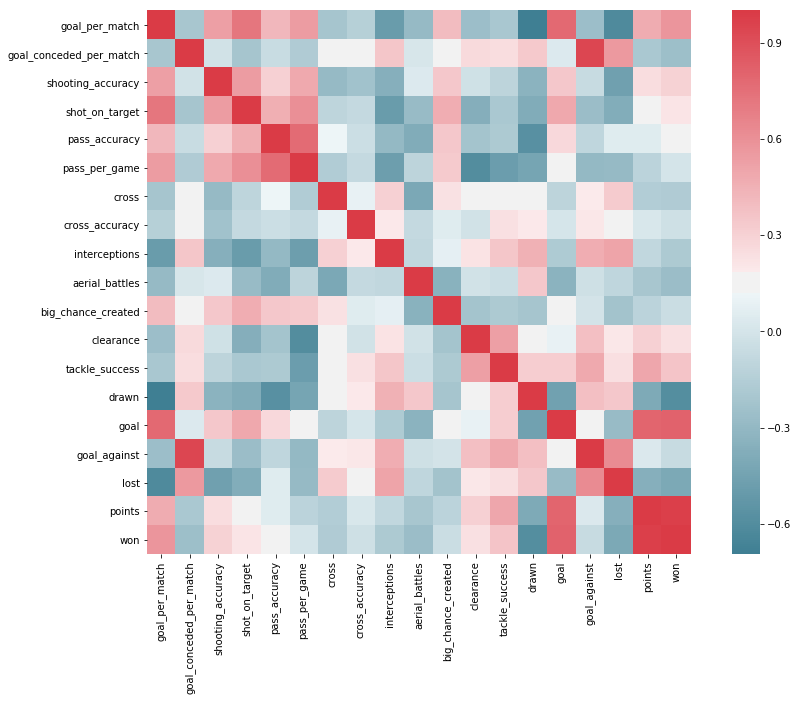

In [38]:
f, ax = plt.subplots(figsize=(15, 10))
corr = data_x.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [39]:
data_x.corr()

,goal_per_match,goal_conceded_per_match,shooting_accuracy,shot_on_target,pass_accuracy,pass_per_game,cross,cross_accuracy,interceptions,aerial_battles,big_chance_created,clearance,tackle_success,drawn,goal,goal_against,lost,points,won
goal_per_match,1.000000,-0.205128,0.534240,0.724249,0.421964,0.549124,-0.217319,-0.144171,-0.493808,-0.285350,0.398146,-0.259242,-0.197941,-0.693692,0.782829,-0.258575,-0.617773,0.471714,0.579716
goal_conceded_per_match,-0.205128,1.000000,-0.013135,-0.213833,-0.052757,-0.166878,0.177576,0.154637,0.356365,0.009699,0.121844,0.263783,0.251641,0.338993,0.039921,0.941099,0.557686,-0.195341,-0.252287
shooting_accuracy,0.534240,-0.013135,1.000000,0.550090,0.311086,0.487300,-0.287253,-0.237131,-0.358073,0.035495,0.347420,-0.021324,-0.111198,-0.336922,0.351489,-0.064120,-0.464793,0.252246,0.301961
shot_on_target,0.724249,-0.213833,0.550090,1.000000,0.459542,0.607573,-0.104548,-0.073252,-0.492865,-0.280257,0.470654,-0.364399,-0.193680,-0.387132,0.495305,-0.268470,-0.378866,0.140531,0.215345
pass_accuracy,0.421964,-0.052757,0.311086,0.459542,1.000000,0.770590,0.117550,-0.043843,-0.295492,-0.384547,0.345552,-0.223400,-0.183063,-0.573564,0.265933,-0.092930,0.048661,0.049411,0.179068
pass_per_game,0.549124,-0.166878,0.487300,0.607573,0.770590,1.000000,-0.163747,-0.078284,-0.480070,-0.111211,0.334621,-0.600652,-0.483884,-0.429283,0.177944,-0.294119,-0.284423,-0.117549,-0.002197
cross,-0.217319,0.177576,-0.287253,-0.104548,0.117550,-0.163747,1.000000,0.089394,0.305673,-0.414500,0.226866,0.175812,0.125021,0.140122,-0.106677,0.190710,0.328380,-0.153392,-0.168323
cross_accuracy,-0.144171,0.154637,-0.237131,-0.073252,-0.043843,-0.078284,0.089394,1.000000,0.197771,-0.077579,0.051517,-0.013781,0.237968,0.194415,0.004949,0.204372,0.182106,0.020482,-0.027878
interceptions,-0.493808,0.356365,-0.358073,-0.492865,-0.295492,-0.480070,0.305673,0.197771,1.000000,-0.085730,0.079800,0.219761,0.353806,0.455309,-0.177219,0.466767,0.510987,-0.085824,-0.183228
aerial_battles,-0.285350,0.009699,0.035495,-0.280257,-0.384547,-0.111211,-0.414500,-0.077579,-0.085730,1.000000,-0.345722,-0.015689,-0.043846,0.350078,-0.338106,-0.028740,-0.094785,-0.209641,-0.267512


After looking at the heatmap above, we can find out that 'won' and 'point', which are directly related with winning the matches, are correlated with 'shooting accuracy', 'shot on target', 'clearance', 'tackle success', and 'goal'.

'goal' is one of the important variables that helps to predict the winning, and it is correlated 'big chane created' As a result, the variables that affect winning are 'shooting accuray', 'shot on target', 'clearance', 'tackle success', 'goal', and 'big chane created'

On the other hand, 'lost' is correlated with 'cross', 'interception', 'goal against', goal conceded per match' and 'big change created'.

To sum up these observations, we can say that to win the match, it is important to have high values on 'shooting accuray' and 'shot on target', but also the team needs to have great performence on defense like 'clearance' and 'tackle success'. Based on the observation on 'lost', a team has higher chance of lose a game when a team tries to have many crosses and interceptions. This means a team is not focus on the shot on target but focus on the header. And interceptions happen when a team is defending;thus, higher number of interceptions might telling us that team is defending too much.

### Exploring the value of variables among  the 1st place to 4th place on the table

### There are big difference on 'goal per match', 'goal conceded per match', and 'big chance created'.

### Based on the plot, 'pass per game' 'is not significantly related with get into higer place.

### The result is the same with the 'pass per game' it looks like it doesn't effect the game that much.

### Base on the plots above, we can say more the 'interceptions' and 'cross ' you have the lower the place you get on top4.

### 'Shot on Target' tend to lead higher place on the table.

# Make statistical models
a. Multinomial Logistic Regression  
b. Support Vector Machine  
c. XG boost  
d. Knn  

### According to the conclusions above, I've chosen 'goal_per_match', 'shooting_accuracy', 'shot_on_target', 'big_chance_created', and 'tackle_success' variables to make and test the statistical models. 

In [45]:
train_x, test_x, train_y, test_y = train_test_split(data_x[['goal_per_match', 'shooting_accuracy', 'shot_on_target',
                                                            'tackle_success', 'big_chance_created']], 
                                                    data_y, test_size = 16, random_state = 5, stratify = data_y)

In [46]:
logist_model = LogisticRegression(random_state = 100)
svc_model = SVC(random_state = 100, kernel='rbf')
xb_model = XGBClassifier()
knn_model = KNeighborsClassifier()

In [47]:
def model_test(model):
    y_pred = model.fit(train_x, train_y).predict(train_x)
    accuracy_score(y_pred, train_y)
    scores = cross_val_score(model, train_x, train_y, cv=2)
    print(scores.mean())

# 4. Choose the best model to predict the final table

In [48]:
model_test(svc_model)

0.681072737797


In [49]:
model_test(logist_model)

0.562897935559


In [50]:
model_test(xb_model)

0.951668917615


In [51]:
model_test(knn_model)

0.570326065985


### Based on the prediction above, XG boost model seems to be the best model. Therefore, XG boost model will be used in the final prediction.

### Getting the 2017/18 data for final prediction
1. current standing table
2. current club's match data

In [52]:
table2017 = pd.read_csv('C:\\sta\\sta141b-proj--hyunil-yoo\\epl_crawler\\table2017.csv')
table2017

,club_name,drawn,goal,goal_against,lost,points,position,won
0,Manchester City,3,83,20,1,78,1,25
1,Manchester United,5,56,22,5,62,2,19
2,Liverpool,9,67,32,3,60,3,17
3,Tottenham Hotspur,7,55,24,5,58,4,17
4,Chelsea,5,50,26,8,53,5,16
5,Arsenal,6,52,41,10,45,6,13
6,Burnley,10,24,26,9,40,7,10
7,Leicester City,10,41,42,10,37,8,9
8,Watford,6,39,47,13,36,9,10
9,Brighton and Hove Albion,10,28,38,11,34,10,8


### Bournemouth has to be changed as AFC Bournemouth because club's match data has it as AFC Bournemouth. Therefore, it has to be changed to join the data frame.

In [53]:
table2017 = table2017[['club_name', 'won', 'drawn', 'lost', 'goal', 'goal_against', 'points', 'position']]
table2017.iat[11,0] = 'AFC Bournemouth'
table2017

,club_name,won,drawn,lost,goal,goal_against,points,position
0,Manchester City,25,3,1,83,20,78,1
1,Manchester United,19,5,5,56,22,62,2
2,Liverpool,17,9,3,67,32,60,3
3,Tottenham Hotspur,17,7,5,55,24,58,4
4,Chelsea,16,5,8,50,26,53,5
5,Arsenal,13,6,10,52,41,45,6
6,Burnley,10,10,9,24,26,40,7
7,Leicester City,9,10,10,41,42,37,8
8,Watford,10,6,13,39,47,36,9
9,Brighton and Hove Albion,8,10,11,28,38,34,10


In [54]:
table2017['position'] = table2017['position'].astype(object)

In [55]:
stats2017 = pd.read_csv('C:\\sta\\sta141b-proj--hyunil-yoo\\club2017_crawler\\club_stats_2017.csv')

### Data have to be preprocessing to be analyzed.

In [56]:
stats2017

,aerial_battles,big_chance_created,clearance,club_name,cross,cross_accuracy,goal_conceded_per_match,goal_per_match,interceptions,pass_accuracy,pass_per_game,shooting_accuracy,shot_on_target,tackle_success
0,"2,061",60,616,Arsenal,438,21%,1.41,1.79,336,84%,629.52,38%,176,69%
1,"2,588",38,865,Stoke City,481,24%,1.86,0.97,361,73%,351.90,33%,104,66%
2,"2,357",28,811,West Ham United,574,21%,1.86,1.24,368,75%,373.79,38%,102,67%
3,"2,025",61,624,Tottenham Hotspur,651,20%,0.83,1.90,277,84%,576.62,33%,168,63%
4,"2,405",33,735,Watford,550,23%,1.62,1.34,359,76%,418.00,27%,95,64%
5,"2,114",34,681,Southampton,641,21%,1.41,1.00,355,79%,475.55,29%,104,70%
6,"2,219",27,756,West Bromwich Albion,608,24%,1.48,0.76,363,72%,345.72,30%,86,65%
7,"2,390",36,914,Newcastle United,456,21%,1.38,0.93,328,72%,356.93,34%,119,67%
8,"2,069",20,724,Swansea City,528,20%,1.45,0.86,298,78%,417.03,29%,72,68%
9,"2,142",27,976,Everton,459,24%,1.69,1.14,416,74%,386.41,33%,87,71%


In [57]:
def data_clean_2017(club):
    """Excluding non-numeric values such as comma and %"""
    club['cross_accuracy'] = club['cross_accuracy'].map(lambda x: x.rstrip('%'))
    club['pass_accuracy'] = club['pass_accuracy'].map(lambda x: x.rstrip('%'))
    club['shooting_accuracy'] = club['shooting_accuracy'].map(lambda x: x.rstrip('%')) 
    club['tackle_success'] = club['tackle_success'].map(lambda x: x.rstrip('%'))
    club['aerial_battles'] = club['aerial_battles'].str.replace(',','')

In [58]:
data_clean_2017(stats2017)
stats2017

,aerial_battles,big_chance_created,clearance,club_name,cross,cross_accuracy,goal_conceded_per_match,goal_per_match,interceptions,pass_accuracy,pass_per_game,shooting_accuracy,shot_on_target,tackle_success
0,2061,60,616,Arsenal,438,21,1.41,1.79,336,84,629.52,38,176,69
1,2588,38,865,Stoke City,481,24,1.86,0.97,361,73,351.90,33,104,66
2,2357,28,811,West Ham United,574,21,1.86,1.24,368,75,373.79,38,102,67
3,2025,61,624,Tottenham Hotspur,651,20,0.83,1.90,277,84,576.62,33,168,63
4,2405,33,735,Watford,550,23,1.62,1.34,359,76,418.00,27,95,64
5,2114,34,681,Southampton,641,21,1.41,1.00,355,79,475.55,29,104,70
6,2219,27,756,West Bromwich Albion,608,24,1.48,0.76,363,72,345.72,30,86,65
7,2390,36,914,Newcastle United,456,21,1.38,0.93,328,72,356.93,34,119,67
8,2069,20,724,Swansea City,528,20,1.45,0.86,298,78,417.03,29,72,68
9,2142,27,976,Everton,459,24,1.69,1.14,416,74,386.41,33,87,71


### Averaging the data that are not in average.

In [59]:
data_transform(stats2017)

def for_stats17(club):
    club['aerial_battles'] = club['aerial_battles'] / 29
    club['interceptions'] = club['interceptions'] / 29
    club['cross'] = club['cross'] / 29
    club['clearance'] = club['clearance'] / 29
    club['big_chance_created'] = club['big_chance_created'] / 29
    club['shot_on_target'] = club['shot_on_target'] / 29
    club['cross_accuracy'] = club['cross_accuracy'] / 100
    club['pass_accuracy'] = club['pass_accuracy'] / 100
    club['shooting_accuracy'] = club['shooting_accuracy'] / 100
    club['tackle_success'] = club['tackle_success'] / 100

In [60]:
for_stats17(stats2017)

In [61]:
col_order(stats2017)

,club_name,goal_per_match,goal_conceded_per_match,shooting_accuracy,shot_on_target,pass_accuracy,pass_per_game,cross,cross_accuracy,interceptions,aerial_battles,big_chance_created,clearance,tackle_success
0,Arsenal,1.79,1.41,0.38,6.068966,0.84,629.52,15.103448,0.21,11.586207,71.068966,2.068966,21.241379,0.69
1,Stoke City,0.97,1.86,0.33,3.586207,0.73,351.90,16.586207,0.24,12.448276,89.241379,1.310345,29.827586,0.66
2,West Ham United,1.24,1.86,0.38,3.517241,0.75,373.79,19.793103,0.21,12.689655,81.275862,0.965517,27.965517,0.67
3,Tottenham Hotspur,1.90,0.83,0.33,5.793103,0.84,576.62,22.448276,0.20,9.551724,69.827586,2.103448,21.517241,0.63
4,Watford,1.34,1.62,0.27,3.275862,0.76,418.00,18.965517,0.23,12.379310,82.931034,1.137931,25.344828,0.64
5,Southampton,1.00,1.41,0.29,3.586207,0.79,475.55,22.103448,0.21,12.241379,72.896552,1.172414,23.482759,0.70
6,West Bromwich Albion,0.76,1.48,0.30,2.965517,0.72,345.72,20.965517,0.24,12.517241,76.517241,0.931034,26.068966,0.65
7,Newcastle United,0.93,1.38,0.34,4.103448,0.72,356.93,15.724138,0.21,11.310345,82.413793,1.241379,31.517241,0.67
8,Swansea City,0.86,1.45,0.29,2.482759,0.78,417.03,18.206897,0.20,10.275862,71.344828,0.689655,24.965517,0.68
9,Everton,1.14,1.69,0.33,3.000000,0.74,386.41,15.827586,0.24,14.344828,73.862069,0.931034,33.655172,0.71


In [62]:
dataset = stats2017.join(table2017.set_index('club_name'), on = 'club_name')
dataset = dataset[['club_name', 'position','goal_per_match', 'goal_conceded_per_match', 'shooting_accuracy', 'shot_on_target', 'pass_accuracy', 
        'pass_per_game', 'cross', 'cross_accuracy', 'interceptions', 'aerial_battles', 'big_chance_created', 'clearance', 
        'tackle_success', 'drawn', 'goal', 'goal_against', 'lost', 'points', 'won']]

In [63]:
data_2017 = dataset.drop(['club_name', 'position'], axis= 1)


variables = [['won','points','goal_per_match', 'goal_conceded_per_match','shooting_accuracy','shot_on_target',
                       'pass_accuracy', 'pass_per_game','cross', 'cross_accuracy','interceptions', 'aerial_battles',
                       'big_chance_created', 'clearance', 'tackle_success', 'drawn', 'goal', 'lost']]
# Make every value in the same scale.
for variable in variables:
    data_2017[variable] = scale(data_2017[variable])

In [64]:
data_2017

,goal_per_match,goal_conceded_per_match,shooting_accuracy,shot_on_target,pass_accuracy,pass_per_game,cross,cross_accuracy,interceptions,aerial_battles,big_chance_created,clearance,tackle_success,drawn,goal,goal_against,lost,points,won
0,0.802257,0.179603,1.192079,1.385578,1.263924,1.634562,-1.919817,-0.274003,-0.033087,-0.772258,1.403408,-0.966056,0.940354,-0.803614,0.805845,41,-0.134396,0.372079,0.453025
1,-0.679389,1.452381,-0.132453,-0.455042,-0.908445,-0.940095,-1.153316,0.990627,0.557756,2.332090,-0.016131,0.973847,-0.371768,0.465250,-0.687613,54,0.843032,-0.856805,-0.841331
2,-0.191530,1.452381,1.192079,-0.506170,-0.513469,-0.737086,0.504464,-0.274003,0.723192,0.971361,-0.661376,0.553145,0.065606,0.465250,-0.189794,54,0.598675,-0.651991,-0.656423
3,1.001015,-1.460867,-0.132453,1.181064,1.263924,1.143966,1.877035,-0.695547,-1.427477,-0.984320,1.467933,-0.903730,-1.683890,-0.380659,0.992528,24,-1.356182,1.259606,1.192656
4,-0.010841,0.773566,-1.721892,-0.685120,-0.315981,-0.327081,0.076650,0.569084,0.510489,1.254110,-0.338754,-0.038954,-1.246516,-0.803614,-0.003111,47,0.598675,-0.242363,-0.101699
5,-0.625183,0.179603,-1.192079,-0.455042,0.276483,0.206639,1.698779,-0.274003,0.415954,-0.460056,-0.274229,-0.459656,1.377728,2.157070,-0.625386,41,0.109961,-0.788534,-1.026239
6,-1.058835,0.377591,-0.927173,-0.915197,-1.105934,-0.997408,1.110535,0.990627,0.605023,0.158457,-0.725901,0.124652,-0.809142,1.311160,-1.060978,43,1.087389,-1.334704,-1.396055
7,-0.751665,0.094751,0.132453,-0.071580,-1.105934,-0.893446,-1.598956,-0.274003,-0.222157,1.165751,-0.145180,1.355595,0.065606,0.042295,-0.749841,40,0.843032,-0.720262,-0.656423
8,-0.878147,0.292739,-1.192079,-1.273095,0.078995,-0.336077,-0.315513,-0.695547,-0.931169,-0.725133,-1.177573,-0.124652,0.502980,-0.803614,-0.874296,42,1.087389,-0.651991,-0.471515
9,-0.372219,0.971554,-0.132453,-0.889633,-0.710957,-0.620048,-1.545479,0.990627,1.857611,-0.295119,-0.725901,1.838623,1.815102,-0.380659,-0.376476,49,0.598675,-0.378906,-0.286607


In [65]:
p_position = xb_model.predict(data_2017[['goal_per_match', 'shooting_accuracy', 'shot_on_target',
                                         'tackle_success', 'big_chance_created']])

In [66]:
final_table= table2017.drop(['won', 'drawn', 'lost', 'goal', 'goal_against', 'points'],axis=1)

In [67]:
final_table['predicted position'] = p_position
final_table

,club_name,position,predicted position
0,Manchester City,1,1
1,Manchester United,2,4
2,Liverpool,3,4
3,Tottenham Hotspur,4,1
4,Chelsea,5,4
5,Arsenal,6,3
6,Burnley,7,4
7,Leicester City,8,4
8,Watford,9,3
9,Brighton and Hove Albion,10,1


### This is the final table that is predicted from the model. However, there are many teams that get high predicted position because the model that I made is based on the only top4 of the table; thus, I might exclude the variables that differenciate other positions that is below 4.

### Let see the prediction on the teams that was chosen from the beginning of the project.

In [68]:
final_table = final_table[(final_table['club_name'] == 'Manchester City') | (final_table['club_name'] == 'Manchester United')|
                          (final_table['club_name'] == 'Liverpool') | (final_table['club_name'] == 'Tottenham Hotspur')|
                          (final_table['club_name'] == 'Chelsea') | (final_table['club_name'] == 'Leicester City')]

In [69]:
final_table

,club_name,position,predicted position
0,Manchester City,1,1
1,Manchester United,2,4
2,Liverpool,3,4
3,Tottenham Hotspur,4,1
4,Chelsea,5,4
7,Leicester City,8,4


### Only Liverpool has the same position as a predicted position. And other predicted positions are pretty relevent with what is going on in real world. However, I cannot agree with Manchester City's predicted position is 2nd because they are currently crushing the league by a lot. If Manchester City want to end up with poision 2nd, they have to loss a lot of games which is very unlikely to happen. In my opinion, it is because data are all averaged. For example, if 'Team A' did poor in the beginning of the season and did exceptional great after few months, it is hard to distinguish with the 'Team B' that is not exceptional great but they are great enough to win the games. And this makes the different in the table because 'Team A' probably got many losts when they are in bad shape, but the 'Team B' wasn't. Therefore, the position in the table for 'Team A' and 'Team B' is totally different, but the average of the match statistics could be simliar. 

### In conclusion, the final prediction seems okay result but definitely not the best. The results from this analysis realize me that using the data that are averaged is not very effective for soccer predictions. The sequenced data would be much bettter because the teams have up and down moment like seasonality. Even after this class is over, I will strive to work on this more because as a soccer enthusiast this is very interesting work.